In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [2]:
ratings = pd.read_csv('kurtiData.csv')
# ratings = ratings.dropna()
ratings.head(10)


,user_id,product_id,product_url,image_url,price,rating,timestamp
0,0b32cb93b4d1467a895fdd0c0fdcac7d,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1816526580
1,a546c81dcb9346619c00f3632bb39318,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1431790209
2,6f7480ff712d42eb9be53f37641a3bf9,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1455698017
3,cf05abc75bd74b159bc91a76ad4bfbb5,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1419335880
4,893a87b0ef41435cbd40f5065bdff448,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1195975318
5,c89e05d268154a1fb8cfd7d6afede628,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1357157330
6,b7345a7a7a094de1a0d4d2d3bdc3153f,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1031813870
7,ef505cc944074e1d83bd9b4276bd7425,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1689641550
8,4a2e0abea61a403c948cb1ce8feb503e,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1219174711
9,a3d7612955c94b2f8c5fb1e1179571bd,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1214821231


In [3]:
ratings.shape
print(ratings['user_id'].nunique())
print(ratings['product_id'].nunique())
print(ratings.shape)

30000
946
(425998, 7)


In [4]:
popular_products = pd.DataFrame((ratings.groupby('product_id')['rating']).count())
popular_products = popular_products.sort_values('rating' ,ascending = False)
popular_products

,rating
product_id,
1c1wnf,17479
77fni,13595
8d8ha,9610
1xiamj,9558
165dfs,9514
...,...
2be8f8,4
2wa4vf,4
2qdu3u,4


<AxesSubplot: xlabel='product_id'>

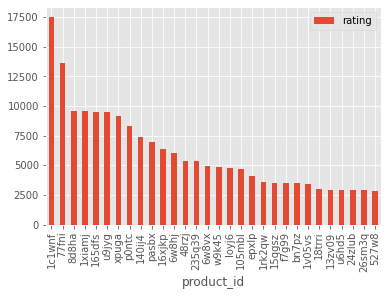

In [5]:
popular_products.head(30).plot(kind = 'bar')

In [28]:
ratings1 = pd.read_csv('./dataset.csv')
ratings1.head()
type(ratings1)

pandas.core.frame.DataFrame

In [7]:
ratings_utility_matrix = ratings.pivot_table(values = 'rating' , columns = 'product_id' , index = 'user_id' , fill_value = 0)
ratings_utility_matrix.head(10)

product_id,100jt3,105mbl,108m4r,108o0m,108skr,10abqj,10lkdl,10mrkq,10nue7,10u824,...,z3u2o,z5qzi,z6ckb,z6lgq,z7ayh,z7l3y,ze031,zgxlp,zqe9o,zs19v
user_id,,,,,,,,,,,,,,,,,,,,,
000309eea4da451792c02dcf044c6da9,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00039769c82740bb8681b29311456292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000ab7843cc04021b2f660fb9f5a4f0c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000b43224557420d8eb107c93c74dd29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000c5704edd84f77bedf68a95c54edeb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000d8a321bc946e393fba8a5f34a5e1a,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000d976ad8ab426bb3d99750049a1da5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001230c85df342fbb391e1ad04f98f3e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00134453b9294bfe9469bfe7fc5606cc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ratings_utility_matrix.shape

(30000, 946)

In [9]:
X = ratings_utility_matrix.T
X.shape
X.head()

user_id,000309eea4da451792c02dcf044c6da9,00039769c82740bb8681b29311456292,000ab7843cc04021b2f660fb9f5a4f0c,000b43224557420d8eb107c93c74dd29,000c5704edd84f77bedf68a95c54edeb,000d8a321bc946e393fba8a5f34a5e1a,000d976ad8ab426bb3d99750049a1da5,001230c85df342fbb391e1ad04f98f3e,00134453b9294bfe9469bfe7fc5606cc,0014cbc3643f4441a56620371929bbbe,...,ffe797f11b454f1dba77d6e5d416fe7b,ffe88816ddac40599901dd7af2b569ca,ffea9cbc6e7c44cdadda2e17fa122331,ffeb81a3149f4811b2ad7e7fd2f80b6c,ffebac10d46e4e079a314d12a5ea2ed8,ffec86d6711348a7bc3a320d86c6d597,ffef7142a8414973851fc85f3be8dfae,fff19d1af160419cac4de7f303c4e647,fffc8d2971bb4b998f5d9720ce49f51f,fffcdbe44df24dcbb816aaa41f0d0830
product_id,,,,,,,,,,,,,,,,,,,,,
100jt3,0,0,0,0,0,1,0,0,0,0,...,0,0,5,0,0,0,0,0,4,0
105mbl,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,5,5,0,4,0,0
108m4r,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108o0m,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108skr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0


In [10]:
SVD = TruncatedSVD(n_components = 1000)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(946, 946)

In [11]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(946, 946)

In [12]:
X.index[79]

'15tluk'

In [13]:
i = '15tluk'

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

79

In [14]:
correlation_product_ID = sorted(enumerate(correlation_matrix[product_ID]) ,key=lambda x:x[1], reverse = True)
mean = np.mean(correlation_product_ID)
mean
correlation_product_ID[0]

(79, 0.9999999999999999)

In [15]:
# Recommend = list(X.index[correlation_product_ID])

# # Removes the item already bought by the customer
# Recommend.remove(i) 
# print(len(Recommend))
# Recommend
data1 = []
for i in correlation_product_ID:
    item = [] 
    temp_df = ratings[ratings['product_id']==X.index[i[0]]]
#     print(temp_df)
    item.extend(list(temp_df.drop_duplicates('product_id')['product_id'].values))
    item.extend(list(temp_df.drop_duplicates('product_id')['image_url'].values))
    item.extend(list(temp_df.drop_duplicates('product_id')['price'].values))
    data1.append(item)
data1[0:10]

[['15tluk',
  'https://images.meesho.com/images/products/70245596/eoxxa_400.webp',
  '₹425'],
 ['13bonp',
  'https://images.meesho.com/images/products/66050197/rbmhs_400.webp',
  '₹306'],
 ['30eos0',
  'https://images.meesho.com/images/products/182083824/uzcon_400.webp',
  '₹581'],
 ['32qayg',
  'https://images.meesho.com/images/products/185985016/am29d_400.webp',
  '₹461'],
 ['2nbsl7',
  'https://images.meesho.com/images/products/160113787/3gwoj_400.webp',
  '₹502'],
 ['39hst3',
  'https://images.meesho.com/images/products/197345559/g7t7j_400.webp',
  '₹492'],
 ['ybkkm',
  'https://images.meesho.com/images/products/57646822/uviis_400.webp',
  '₹477'],
 ['rh29x',
  'https://images.meesho.com/images/products/46145733/tywdg_400.webp',
  '₹1,047'],
 ['2ek54p',
  'https://images.meesho.com/images/products/145386745/9cshh_400.webp',
  '₹531'],
 ['z7ayh',
  'https://images.meesho.com/images/products/59127353/gkhes_400.webp',
  '₹581']]

In [16]:
[['15tluk',
  'https://images.meesho.com/images/products/70245596/eoxxa_400.webp',
  '₹425'],
 ['13bonp',
  'https://images.meesho.com/images/products/66050197/rbmhs_400.webp',
  '₹306'],
 ['30eos0',
  'https://images.meesho.com/images/products/182083824/uzcon_400.webp',
  '₹581'],
 ['32qayg',
  'https://images.meesho.com/images/products/185985016/am29d_400.webp',
  '₹461'],
 ['2nbsl7',
  'https://images.meesho.com/images/products/160113787/3gwoj_400.webp',
  '₹502'],
 ['39hst3',
  'https://images.meesho.com/images/products/197345559/g7t7j_400.webp',
  '₹492'],
 ['ybkkm',
  'https://images.meesho.com/images/products/57646822/uviis_400.webp',
  '₹477'],
 ['rh29x',
  'https://images.meesho.com/images/products/46145733/tywdg_400.webp',
  '₹1,047'],
 ['2ek54p',
  'https://images.meesho.com/images/products/145386745/9cshh_400.webp',
  '₹531'],
 ['17nd88',
  'https://images.meesho.com/images/products/73313720/tsedu_400.webp',
  '₹486']]

[['15tluk',
  'https://images.meesho.com/images/products/70245596/eoxxa_400.webp',
  '₹425'],
 ['13bonp',
  'https://images.meesho.com/images/products/66050197/rbmhs_400.webp',
  '₹306'],
 ['30eos0',
  'https://images.meesho.com/images/products/182083824/uzcon_400.webp',
  '₹581'],
 ['32qayg',
  'https://images.meesho.com/images/products/185985016/am29d_400.webp',
  '₹461'],
 ['2nbsl7',
  'https://images.meesho.com/images/products/160113787/3gwoj_400.webp',
  '₹502'],
 ['39hst3',
  'https://images.meesho.com/images/products/197345559/g7t7j_400.webp',
  '₹492'],
 ['ybkkm',
  'https://images.meesho.com/images/products/57646822/uviis_400.webp',
  '₹477'],
 ['rh29x',
  'https://images.meesho.com/images/products/46145733/tywdg_400.webp',
  '₹1,047'],
 ['2ek54p',
  'https://images.meesho.com/images/products/145386745/9cshh_400.webp',
  '₹531'],
 ['17nd88',
  'https://images.meesho.com/images/products/73313720/tsedu_400.webp',
  '₹486']]

In [17]:
X

user_id,000309eea4da451792c02dcf044c6da9,00039769c82740bb8681b29311456292,000ab7843cc04021b2f660fb9f5a4f0c,000b43224557420d8eb107c93c74dd29,000c5704edd84f77bedf68a95c54edeb,000d8a321bc946e393fba8a5f34a5e1a,000d976ad8ab426bb3d99750049a1da5,001230c85df342fbb391e1ad04f98f3e,00134453b9294bfe9469bfe7fc5606cc,0014cbc3643f4441a56620371929bbbe,...,ffe797f11b454f1dba77d6e5d416fe7b,ffe88816ddac40599901dd7af2b569ca,ffea9cbc6e7c44cdadda2e17fa122331,ffeb81a3149f4811b2ad7e7fd2f80b6c,ffebac10d46e4e079a314d12a5ea2ed8,ffec86d6711348a7bc3a320d86c6d597,ffef7142a8414973851fc85f3be8dfae,fff19d1af160419cac4de7f303c4e647,fffc8d2971bb4b998f5d9720ce49f51f,fffcdbe44df24dcbb816aaa41f0d0830
product_id,,,,,,,,,,,,,,,,,,,,,
100jt3,0,0,0,0,0,1,0,0,0,0,...,0,0,5,0,0,0,0,0,4,0
105mbl,4,0,0,0,0,0,0,0,0,0,...,0,0,4,0,5,5,0,4,0,0
108m4r,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108o0m,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108skr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
z7l3y,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ze031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zgxlp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
similarity_scores = cosine_similarity(X)

In [20]:
similarity_scores.shape
# type(similarity_scores)

(946, 946)

In [26]:
def recommend(product_id):
    # index fetch
#     index = product_names.index(product_id)
#     print(index)
# #     similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]

#     data = []
#     for i,item in sorted(list(enumerate(similarity_scores[index])) ,key=lambda a:a[1] , reverse = True)[0:10]:
# #         print(i , item)
#         list1=[]
#         temp_df= ratings[ratings['product_id']==index[i]]
#         list1.extend(list(temp.df.drop_duplicates('product_id')['product_id'].values))
#         list1.extend(list(temp.df.drop_duplicates('product_id')['img_url'].values))
#         list1.extend(list(temp.df.drop_duplicates('product_id')['price'].values))
#         data.append(list1)
        
    index = np.where(X.index==product_id)[0][0]
    similar_items= sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)
    
    data = []
    for i in similar_items[0:12]:
        item = [] 
        temp_df = ratings[ratings['product_id']==X.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('product_id')['product_id'].values))
        item.extend(list(temp_df.drop_duplicates('product_id')['image_url'].values))
        item.extend(list(temp_df.drop_duplicates('product_id')['price'].values))
        
        data.append(item)
    return data

In [27]:
recommend('15tluk')

[['15tluk',
  'https://images.meesho.com/images/products/70245596/eoxxa_400.webp',
  '₹425'],
 ['13bonp',
  'https://images.meesho.com/images/products/66050197/rbmhs_400.webp',
  '₹306'],
 ['30eos0',
  'https://images.meesho.com/images/products/182083824/uzcon_400.webp',
  '₹581'],
 ['32qayg',
  'https://images.meesho.com/images/products/185985016/am29d_400.webp',
  '₹461'],
 ['2nbsl7',
  'https://images.meesho.com/images/products/160113787/3gwoj_400.webp',
  '₹502'],
 ['39hst3',
  'https://images.meesho.com/images/products/197345559/g7t7j_400.webp',
  '₹492'],
 ['ybkkm',
  'https://images.meesho.com/images/products/57646822/uviis_400.webp',
  '₹477'],
 ['rh29x',
  'https://images.meesho.com/images/products/46145733/tywdg_400.webp',
  '₹1,047'],
 ['2ek54p',
  'https://images.meesho.com/images/products/145386745/9cshh_400.webp',
  '₹531'],
 ['17nd88',
  'https://images.meesho.com/images/products/73313720/tsedu_400.webp',
  '₹486'],
 ['z7ayh',
  'https://images.meesho.com/images/products

In [23]:
import pickle
pickle.dump(X,open('X.pkl','wb'))
pickle.dump(ratings,open('ratings1.pkl','wb'))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))
pickle.dump(correlation_matrix , open('correlation_matrix.pkl','wb'))